In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Natielle\anaconda3\env

## Aplicando a rede neural com imagens

O objetivo é adivinhar qual é o dígito através da imagem.
Banco de dados da Mnist. Pode ser encontrado em: http://yann.lecun.com/exdb/mnist/

In [2]:
# Lendo as imagens e fazendo download
mnist = input_data.read_data_sets('mnist/', # As imagens ficarão nesse diretório 
                                  one_hot = True) # Faz a categorização "binária" de múltiplas classes

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Separando os dados em treino e teste
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test  = mnist.test.images
Y_test  = mnist.test.labels

# Analisando as dimensões
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (55000, 784)
X_test:  (10000, 784)
Y_train:  (55000, 10)
Y_test:  (10000, 10)


Nota-se que as imagens possuem 28x28 de dimensão, logo as imagens possuem 28*28=784 atributos.

Aliás, podemos ver abaixo que os dados já estão normalizados pois os valores vem em escala de 0 a 255. Então não vamos precisar normalizar o banco porque isso já está sendo realizado.

In [4]:
# representação de uma imagem em formato de matriz
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Text(0.5, 1.0, 'Classe: 7')

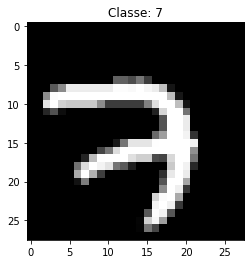

In [6]:
# Agora vamos observar de fato alguma imagem carregada
%matplotlib inline
indice = 0
plt.imshow(X_train[indice].reshape((28,28)), cmap = 'gray') # em esscala de cinza
plt.title('Classe: ' + str(np.argmax(Y_train[indice])))

Text(0.5, 1.0, 'Classe: 4')

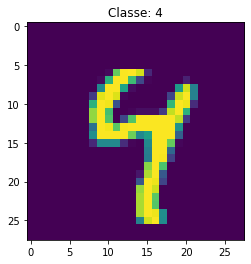

In [7]:
%matplotlib inline
indice = 2
plt.imshow(X_train[indice].reshape((28,28))) # Sem o filtro de cinza
plt.title('Classe: ' + str(np.argmax(Y_train[indice])))

In [8]:
X_batch, Y_batch = mnist.train.next_batch(128) # separamos o batch_size com 128 imagens
X_batch.shape

(128, 784)

In [14]:
# Vamos definir os neurônios da rede neural agora

# Camada de entrada
neuronios_entrada = X_train.shape[1]
print("\n Quantidade de neurônios de entrada: ", neuronios_entrada)

# Camadas ocultas, nesse caso iremos utilizar 3
neuronios_oculta1 = int((X_train.shape[1] + Y_train.shape[1]) / 2)
print("\n Quantidade de neurônios de oculta 1: ", neuronios_oculta1)

neuronios_oculta2 = neuronios_oculta1
print("\n Quantidade de neurônios de oculta 2: ", neuronios_oculta2)

neuronios_oculta3 = neuronios_oculta1
print("\n Quantidade de neurônios de oculta 3: ", neuronios_oculta3)

# Camada de saída
neuronios_saida = Y_train.shape[1]
print("\n Quantidade de neurônios de saida: ", neuronios_saida)


 Quantidade de neurônios de entrada:  784

 Quantidade de neurônios de oculta 1:  397

 Quantidade de neurônios de oculta 2:  397

 Quantidade de neurônios de oculta 3:  397

 Quantidade de neurônios de saida:  10


**Observações:**

- Podemos considerar deep learning as redes neurais que posssuem, aproximadamente, mais do que duas camadas ocultas.
- A quantidade de neurônios de entrada é a quantidade de atributos da imagem (28*28 = 784)
- A quantidade de neurônios de saída é a quantidade de labels que queremos adivinhar. Ou seja, números de 0 a 9.

In [15]:
# Portanto precisaremos definir os pesos e os bias

W = {'oculta1': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta1, neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta2, neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_oculta3, neuronios_saida])) 
}

B = {'oculta1': tf.Variable(tf.random_normal([neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]))   
}

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# Visualizando os tipos das variáveis
print("\n W: ", W)
print("\n\n type(W['oculta1']): ", type(W['oculta1']))
print("\n\n W[\'oculta1\']: ", W['oculta1'])

# Visualizando os tipos das variáveis
print("\n B: ", B)
print("\n\n type(B['oculta1']): ", type(B['oculta1']))
print("\n\n B[\'oculta\']: ", B['oculta1'])


 W:  {'oculta1': <tf.Variable 'Variable:0' shape=(784, 397) dtype=float32_ref>, 'oculta2': <tf.Variable 'Variable_1:0' shape=(397, 397) dtype=float32_ref>, 'oculta3': <tf.Variable 'Variable_2:0' shape=(397, 397) dtype=float32_ref>, 'saida': <tf.Variable 'Variable_3:0' shape=(397, 10) dtype=float32_ref>}


 type(W['oculta1']):  <class 'tensorflow.python.ops.variables.RefVariable'>


 W['oculta1']:  <tf.Variable 'Variable:0' shape=(784, 397) dtype=float32_ref>

 B:  {'oculta1': <tf.Variable 'Variable_4:0' shape=(397,) dtype=float32_ref>, 'oculta2': <tf.Variable 'Variable_5:0' shape=(397,) dtype=float32_ref>, 'oculta3': <tf.Variable 'Variable_6:0' shape=(397,) dtype=float32_ref>, 'saida': <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>}


 type(B['oculta1']):  <class 'tensorflow.python.ops.variables.RefVariable'>


 B['oculta']:  <tf.Variable 'Variable_4:0' shape=(397,) dtype=float32_ref>


In [18]:
# Definindo os placeholders que irão receber os dados
xph = tf.placeholder('float', [None, neuronios_entrada]) # None -> não importa a quantidade de linhas na dimensão 
yph = tf.placeholder('float', [None, neuronios_saida])   # None -> não importa a quantidade de linhas na dimensão 

In [20]:
print(xph) 
print(yph) 

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [23]:
# Processo de feed foward
def mlp(x, W, bias):
    # Vamos utilizar a função de ativação relu -> f(x) = max(0,x)
    camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(x, W['oculta1']), bias['oculta1']))
    camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, W['oculta2']), bias['oculta2']))
    camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, W['oculta3']), bias['oculta3']))
    camada_saida = tf.add(tf.matmul(camada_oculta3, W['saida']), bias['saida'])
    
    # Nota: ainda não aplicamos a função de ativação na camada de saída
    # Nota que sempre estamos adicionando o bias
    
    return camada_saida

In [24]:
# Criando o modelo
modelo = mlp(xph, W, B)

In [27]:
# Então vamos calcular o erro
# logits -> previsões do modelo; label -> classes corretas
# E não precisamos aplicar a função softmax depois porque ela já é aplicada aqui
erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = modelo, labels = yph))
print("Erro inicial: ", erro) # Podemos confirmar que será um número escalar

# Vamos minimizar os erros com o otimizador Adam ao invés de usar o gradiente descendente 
otimizador = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(erro)

Erro inicial:  Tensor("Mean_2:0", shape=(), dtype=float32)


Para entender um pouco melhor o que está sendo feito, podemos olhar a figura a seguir:

![](softmax_CE_pipeline.png)

Nota-se que:
- CE: Cross Entropy
- É preferível trabalhar com a Cross Entropy em deep learning do que com a MSE porque o número elevado ao quadrado no MSE pode deixar o processamento mais lento.

In [30]:
# Agora vamos realizar as épocas para treinar o modelo
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoca in range(5000):
        # Vamos fazer o processamento de lote em lote, nesse caso é em lote de 128.
        X_batch, Y_batch = mnist.train.next_batch(128)
        
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: X_batch, yph: Y_batch})
        
        if epoca % 100 == 0:
            print('época: ' + str((epoca + 1)) + ' erro: ' + str(custo))
            
    print('Treinamento concluído')

época: 1 erro: 65431.816
época: 101 erro: 20860.05
época: 201 erro: 11099.249
época: 301 erro: 8189.3022
época: 401 erro: 6204.449
época: 501 erro: 4396.2617
época: 601 erro: 3586.929
época: 701 erro: 3396.566
época: 801 erro: 3592.3438
época: 901 erro: 2021.584
época: 1001 erro: 3241.6436
época: 1101 erro: 1733.7134
época: 1201 erro: 1692.2202
época: 1301 erro: 1510.6772
época: 1401 erro: 1852.7744
época: 1501 erro: 1848.2762
época: 1601 erro: 1154.8455
época: 1701 erro: 1767.9495
época: 1801 erro: 784.161
época: 1901 erro: 1837.6746
época: 2001 erro: 522.1771
época: 2101 erro: 1261.4734
época: 2201 erro: 1461.5529
época: 2301 erro: 1165.7201
época: 2401 erro: 1329.8939
época: 2501 erro: 1285.7783
época: 2601 erro: 1087.8186
época: 2701 erro: 703.30493
época: 2801 erro: 940.7085
época: 2901 erro: 616.9698
época: 3001 erro: 517.59656
época: 3101 erro: 1009.2645
época: 3201 erro: 739.3825
época: 3301 erro: 724.0027
época: 3401 erro: 1033.6606
época: 3501 erro: 636.75885
época: 3601 erro

In [40]:
# Agora vamos fazer as previsões
previsoes = tf.nn.softmax(modelo)
print("Previsões", previsoes)

# podemos ver os valores dentro de uma sessão também
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(previsoes, feed_dict= {xph: X_test}))

Previsões Tensor("Softmax_3:0", shape=(?, 10), dtype=float32)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Com isso, podemos observar os labels previstos estão no formato de categorização "binária" (oneHotEncoder). Então vamos converter os labels em números de 0 a 9, que é o que queremos prever.

In [41]:
previsoes_corretas_labels = tf.argmax(previsoes, 1)
print(previsoes_corretas_labels)

# podemos ver os valores dentro de uma sessão também
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(previsoes_corretas_labels, feed_dict= {xph: X_test}))

Tensor("ArgMax_9:0", shape=(?,), dtype=int64)
[2 1 1 ... 7 2 7]


Agora sim temos que a 1° e 2° imagem é o número 4 e assim por diante...



In [42]:
# Agora vamos fazer um comparativo das previsões com o que é realmente
previsoes_corretas_bool = tf.equal(previsoes_corretas_labels, tf.argmax(yph, 1))

# podemos ver os valores dentro de uma sessão também
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(previsoes_corretas_bool, feed_dict= {xph: X_test, yph: Y_test}))

[False False False ... False False  True]


Podemos notar que ele retorna se a previsão feita está correta ou não.

In [44]:
# Com isso, podemos calcular a taxa de acerto
# tf.cast -> faz a conversão do booleando para tf.float32
taxa_acerto = tf.reduce_mean(tf.cast(previsoes_corretas_bool, tf.float32))

# Podemos visualizar a taxa de acerto enquanto formos treinando também dentro de uma 
# sesão pois já temos as fórmulas definidas
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoca in range(5000):
        X_batch, Y_batch = mnist.train.next_batch(128)
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: X_batch, yph: Y_batch})
        if epoca % 100 == 0:
            acc = sess.run([taxa_acerto], feed_dict = {xph: X_batch, yph: Y_batch})
            print('época: ' + str((epoca + 1)) + ' erro: ' + str(custo) + ' acc: ' + str(acc))
            
    print('Treinamento concluído')
    print(sess.run(taxa_acerto, feed_dict = {xph: X_test, yph: Y_test}))

época: 1 erro: 52063.316 acc: [0.0234375]
época: 101 erro: 16807.594 acc: [0.2265625]
época: 201 erro: 8900.271 acc: [0.3359375]
época: 301 erro: 5236.3135 acc: [0.4921875]
época: 401 erro: 4095.3142 acc: [0.5390625]
época: 501 erro: 3963.2349 acc: [0.609375]
época: 601 erro: 3594.1694 acc: [0.6328125]
época: 701 erro: 2848.9712 acc: [0.7109375]
época: 801 erro: 2513.4778 acc: [0.703125]
época: 901 erro: 2230.3599 acc: [0.75]
época: 1001 erro: 2712.2393 acc: [0.6875]
época: 1101 erro: 2211.754 acc: [0.71875]
época: 1201 erro: 1885.077 acc: [0.7578125]
época: 1301 erro: 1580.5377 acc: [0.8125]
época: 1401 erro: 1487.129 acc: [0.8046875]
época: 1501 erro: 1865.7029 acc: [0.7734375]
época: 1601 erro: 1733.6587 acc: [0.765625]
época: 1701 erro: 1085.3037 acc: [0.8359375]
época: 1801 erro: 1479.6613 acc: [0.8359375]
época: 1901 erro: 1324.1008 acc: [0.8203125]
época: 2001 erro: 1368.9297 acc: [0.84375]
época: 2101 erro: 1299.4852 acc: [0.859375]
época: 2201 erro: 1363.2285 acc: [0.8125]
épo

Quando treinamos e já vamos mostrando as métricas, podemos notar que taxa de acerto vai aumentando e o erro vai diminuindo 